# Content
1. Import Library
2. Import Dataset
3. Select Specific Numarical Columns for Transformation
4. Missing value impute
5. Train Test Split
6. **See Original distribution**
  1. `On Academic Staff`
  2. `Number of Students`
  3. `Volumes in the library`
7. **Log Transformation** `np.log1p(x)`
  1. `On Academic Staff`
  2. `Number of Students`
  3. `Volumes in the library`
8. **Reciprocal Transformation** `1/x`
  1. `On Academic Staff`
  2. `Number of Students`
  3. `Volumes in the library`
9. **Power Transformation** `x**2`
  1. `On Academic Staff`
  2. `Number of Students`
  3. `Volumes in the library`
10. **Square-Root Transformation** `np.sqrt(x)`
  1. `On Academic Staff`
  2. `Number of Students`
  3. `Volumes in the library`
11. Compare these Transformation which one is best
  1. `On Academic Staff`
      - Log Transformation
      - Reciprocal Transformation
      - Power Transformation
      - Squre-Root Transformation
  2. `Number of Students`
      - Log Transformation
      - Reciprocal Transformation
      - Power Transformation
      - Squre-Root Transformation
  3. `Volumes in the library`
      - Log Transformation
      - Reciprocal Transformation
      - Power Transformation
      - Squre-Root Transformation

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Import dataset

In [3]:
df= pd.read_csv('sample_data/NorthAmericaUniversities.csv', encoding='latin-1')

In [4]:
df.head()

,Rank,Name,Country,Established,Academic Staff,Number of Students,Minimum Tuition cost,Volumes in the library,Endowment
0,1,Massachusetts Institute of Technology,us,1861,1069.0,11920.0,"$50,000.00",1351391.0,$24.6B
1,2,Harvard University,us,1636,2400.0,21613.0,"$50,000.00",14440248.0,$50.7B
2,3,Stanford University,us,1885,2323.0,17529.0,"$50,000.00",6625926.0,$36.5B
3,4,Cornell University,us,1865,1639.0,26284.0,"$50,000.00",5270855.0,$10.7B
4,5,"University of California, Berkeley",us,1868,NaN,45307.0,"$12,500.00",7718398.0,$7.4B


# Select Specific Numarical Columns for Transformation

In [5]:
df.drop(columns=['Name', 'Country'], axis=1, inplace=True)
df.head()

,Rank,Established,Academic Staff,Number of Students,Minimum Tuition cost,Volumes in the library,Endowment
0,1,1861,1069.0,11920.0,"$50,000.00",1351391.0,$24.6B
1,2,1636,2400.0,21613.0,"$50,000.00",14440248.0,$50.7B
2,3,1885,2323.0,17529.0,"$50,000.00",6625926.0,$36.5B
3,4,1865,1639.0,26284.0,"$50,000.00",5270855.0,$10.7B
4,5,1868,NaN,45307.0,"$12,500.00",7718398.0,$7.4B


In [6]:
df.drop(columns=['Rank', 'Endowment'], axis=1, inplace=True)
df.head()

,Established,Academic Staff,Number of Students,Minimum Tuition cost,Volumes in the library
0,1861,1069.0,11920.0,"$50,000.00",1351391.0
1,1636,2400.0,21613.0,"$50,000.00",14440248.0
2,1885,2323.0,17529.0,"$50,000.00",6625926.0
3,1865,1639.0,26284.0,"$50,000.00",5270855.0
4,1868,NaN,45307.0,"$12,500.00",7718398.0


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Established             200 non-null    int64  
 1   Academic Staff          181 non-null    float64
 2   Number of Students      199 non-null    float64
 3   Minimum Tuition cost    196 non-null    object 
 4   Volumes in the library  176 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [9]:
df['Minimum Tuition cost'][0].split('$')[1]

'50,000.00'

In [10]:
df['Minimum Tuition cost'] = df['Minimum Tuition cost'].astype(str).apply(lambda x: x.split('$')[1] if '$' in x else np.nan)

In [11]:
df['Minimum Tuition cost'] = df['Minimum Tuition cost'].str.replace(',', '')

In [12]:
df.head()

,Established,Academic Staff,Number of Students,Minimum Tuition cost,Volumes in the library
0,1861,1069.0,11920.0,50000.00,1351391.0
1,1636,2400.0,21613.0,50000.00,14440248.0
2,1885,2323.0,17529.0,50000.00,6625926.0
3,1865,1639.0,26284.0,50000.00,5270855.0
4,1868,NaN,45307.0,12500.00,7718398.0


In [13]:
df['Minimum Tuition cost'] = df['Minimum Tuition cost'].astype(float)

In [14]:
df.isnull().sum()

,0
Established,0
Academic Staff,19
Number of Students,1
Minimum Tuition cost,4
Volumes in the library,24


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Established             200 non-null    int64  
 1   Academic Staff          181 non-null    float64
 2   Number of Students      199 non-null    float64
 3   Minimum Tuition cost    196 non-null    float64
 4   Volumes in the library  176 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Missing value impute

In [16]:
df['Academic Staff'].fillna(df['Academic Staff'].mean(), inplace=True)
df['Number of Students'].fillna(df['Number of Students'].mean(), inplace=True)
df['Minimum Tuition cost'].fillna(df['Minimum Tuition cost'].mean(), inplace=True)
df['Volumes in the library'].fillna(df['Volumes in the library'].mean(), inplace=True)

<ipython-input-16-77b6ebab0534>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Academic Staff'].fillna(df['Academic Staff'].mean(), inplace=True)
<ipython-input-16-77b6ebab0534>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [17]:
df.isnull().sum()

,0
Established,0
Academic Staff,0
Number of Students,0
Minimum Tuition cost,0
Volumes in the library,0


# Train Test Split

In [18]:
X = df.drop(columns=['Minimum Tuition cost'])
y = df['Minimum Tuition cost']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape

((160, 4), (40, 4))

 # See Original distribution

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Established             200 non-null    int64  
 1   Academic Staff          200 non-null    float64
 2   Number of Students      200 non-null    float64
 3   Minimum Tuition cost    200 non-null    float64
 4   Volumes in the library  200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## 1. Academic Staff

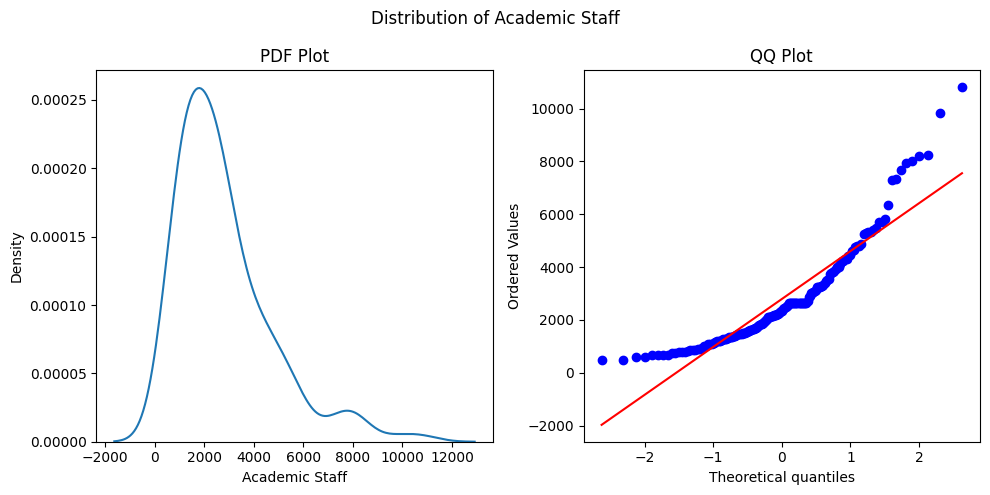

In [22]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5))
figure.suptitle('Distribution of Academic Staff')

sns.kdeplot(X_train['Academic Staff'], ax=axes[0])
axes[0].set_title('PDF Plot')

stats.probplot(X_train['Academic Staff'], dist="norm", plot=axes[1]) # Change is here
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

In [23]:
# Skew Check
X_train['Academic Staff'].skew()

1.559071960630387

## 2. Number of Students

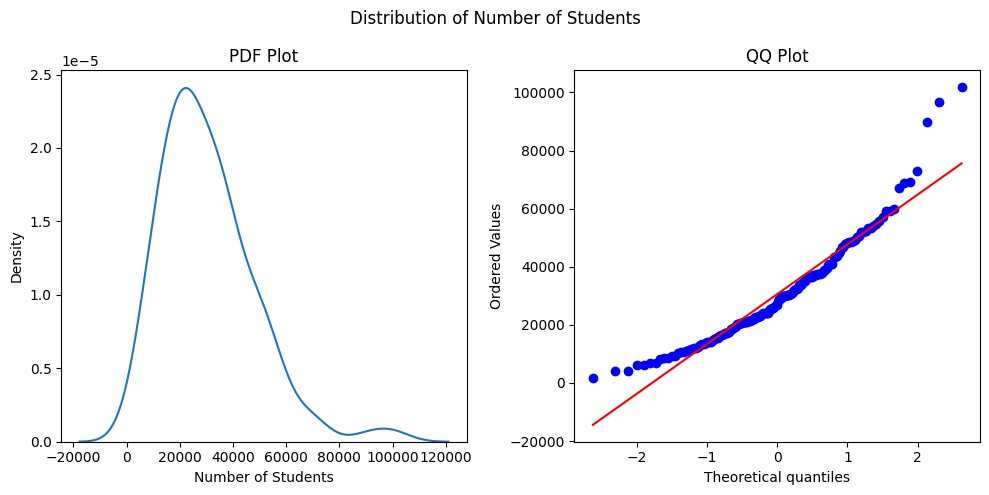

In [24]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5))
figure.suptitle('Distribution of Number of Students')

sns.kdeplot(X_train['Number of Students'], ax=axes[0])
axes[0].set_title('PDF Plot')

stats.probplot(X_train['Number of Students'], dist="norm", plot=axes[1]) # Change is here
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

In [25]:
# Skewness Check
X_train['Number of Students'].skew()

1.2045697184821256

## 3. Volumes in the library

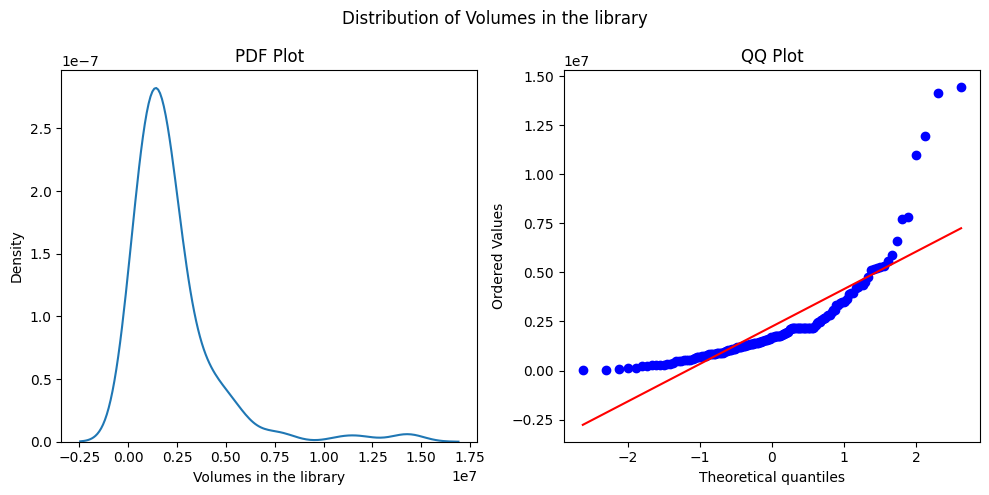

In [26]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5))
figure.suptitle('Distribution of Volumes in the library')

sns.kdeplot(X_train['Volumes in the library'], ax=axes[0])
axes[0].set_title('PDF Plot')

stats.probplot(X_train['Volumes in the library'], dist="norm", plot=axes[1]) # Change is here
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

In [27]:
X_train['Volumes in the library'].skew()

3.03137710373831

# Log Transformation

## 1. On Academic Staff

In [28]:
X_train_log_transform1 = np.log1p(X_train['Academic Staff'])

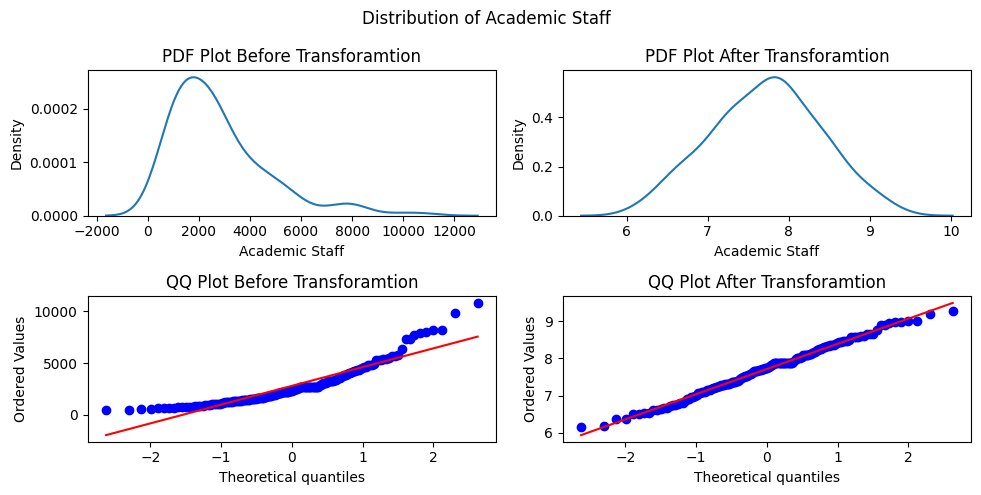

In [29]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Academic Staff')

#PDF of Academic Staf
sns.kdeplot(X_train['Academic Staff'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_log_transform1, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

#QQ-Plot of Academic Staf
stats.probplot(X_train['Academic Staff'], dist="norm", plot=axes[1, 0]) # Change is here
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_log_transform1, dist="norm", plot=axes[1, 1]) # Change is here
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [30]:
X_train_log_transform1.skew()

-0.05081166274503904

## On `Number of Students`

In [31]:
X_train_log_transform2 = np.log1p(X_train['Number of Students'])

<bound method Axes.set of <Axes: title={'center': 'Probability Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>>

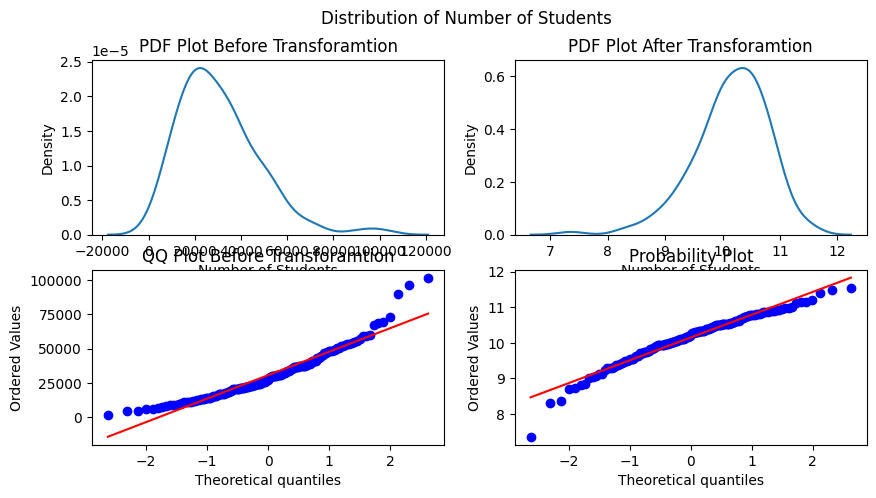

In [32]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Number of Students')

#PDF of Academic Staf
sns.kdeplot(X_train['Number of Students'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_log_transform2, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

#QQ-plot of Number of Students
stats.probplot(X_train['Number of Students'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_log_transform2, dist="norm", plot=axes[1, 1])
axes[1, 1].set

In [33]:
X_train_log_transform2.skew()

-0.8648204378381733

##  On `Volumes in the library`

In [34]:
X_train_log_transform3 = np.log1p(X_train['Volumes in the library'])

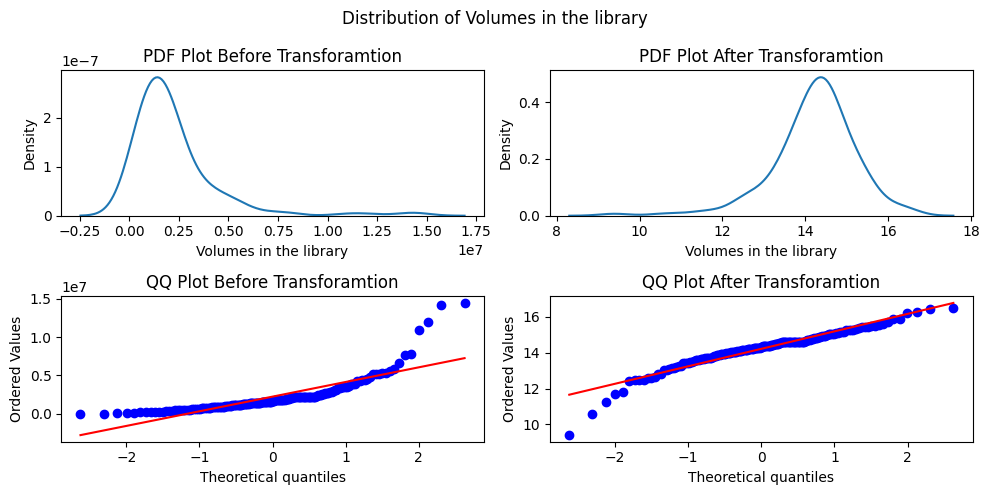

In [35]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Volumes in the library')

#PDF of Academic Staf
sns.kdeplot(X_train['Volumes in the library'], ax=axes[0,0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_log_transform3, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

#QQ-plot of Number of Students
stats.probplot(X_train['Volumes in the library'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_log_transform3, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [36]:
X_train_log_transform3.skew()

-1.1635622453855057

# Reciprocal Transformation

## 1. In Academic Staff

In [37]:
X_train_reciprocal_transform1 = 1/X_train['Academic Staff']

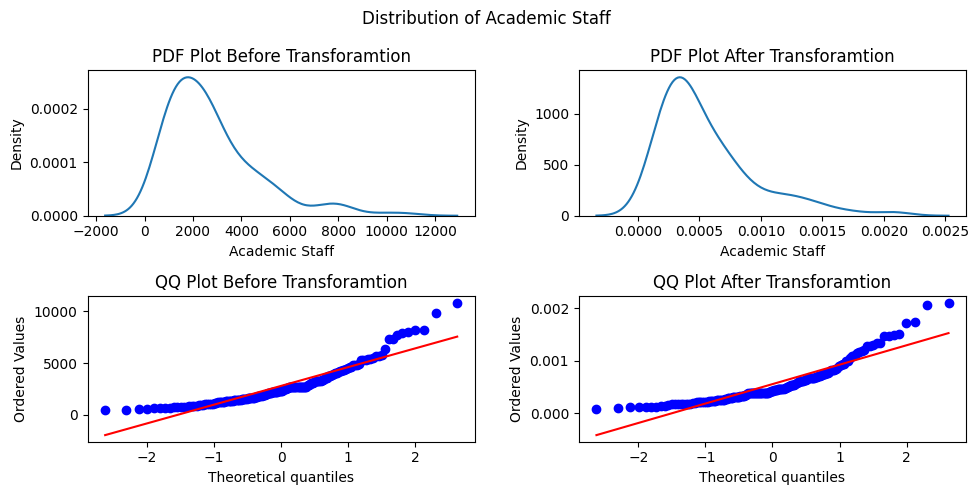

In [38]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Academic Staff')

#PDF of Academic Staf
sns.kdeplot(X_train['Academic Staff'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_reciprocal_transform1, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

#QQ-Plot of Academic Staf
stats.probplot(X_train['Academic Staff'], dist="norm", plot=axes[1, 0]) # Change is here
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_reciprocal_transform1, dist="norm", plot=axes[1, 1]) # Change is here
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [39]:
X_train['Academic Staff'].skew(), X_train_reciprocal_transform1.skew()

(1.559071960630387, 1.5561663806665162)

## On Number of Students

In [41]:
X_train_reciprocal_transform2 = 1/X_train['Number of Students']

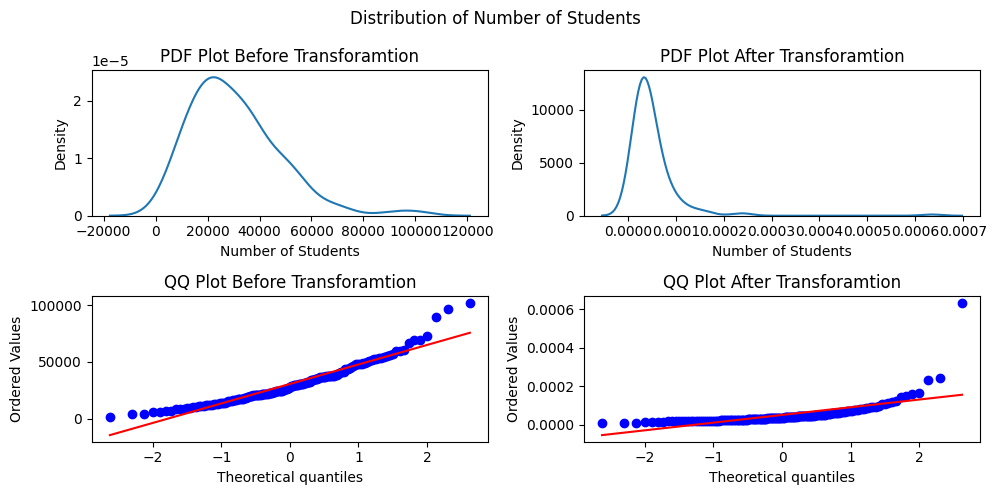

In [42]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Number of Students')

sns.kdeplot(X_train['Number of Students'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_reciprocal_transform2, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

stats.probplot(X_train['Number of Students'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_reciprocal_transform2, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [43]:
X_train_reciprocal_transform2.skew(), X_train['Number of Students'].skew()

(6.741684980738737, 1.2045697184821256)

## On Volumes in the library

In [44]:
X_train_reciprocal_transform3 = 1/X_train['Volumes in the library']

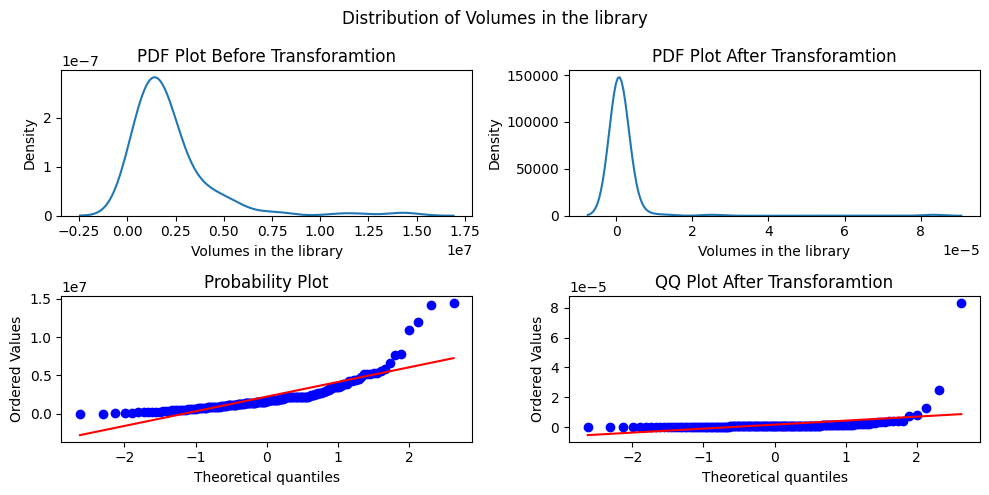

In [46]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Volumes in the library')

sns.kdeplot(X_train['Volumes in the library'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_reciprocal_transform3, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

stats.probplot(X_train['Volumes in the library'], dist="norm", plot=axes[1,0])
axes[1, 1].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_reciprocal_transform3, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [48]:
X_train['Volumes in the library'].skew(), X_train_reciprocal_transform3.skew()

(3.03137710373831, 10.723725585662034)

# Power Transformation

## On Academic Staff

In [49]:
X_train_power_transform1 = X_train['Academic Staff']**2

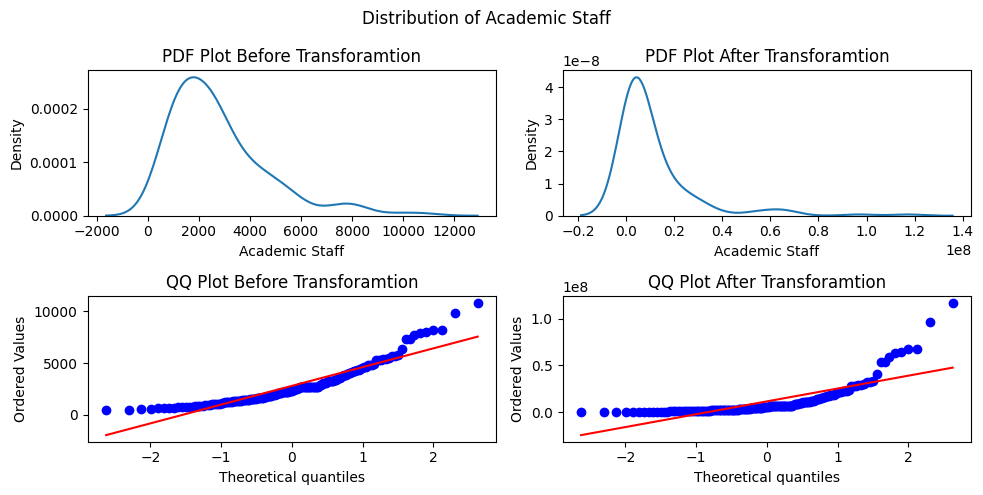

In [50]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Academic Staff')

sns.kdeplot(X_train['Academic Staff'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_power_transform1, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

stats.probplot(X_train['Academic Staff'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_power_transform1, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [51]:
X_train['Academic Staff'].skew(), X_train_power_transform1.skew()

(1.559071960630387, 3.2199108412598796)

## Onn Number of Students

In [52]:
X_train_power_transform2 = X_train['Number of Students']**2

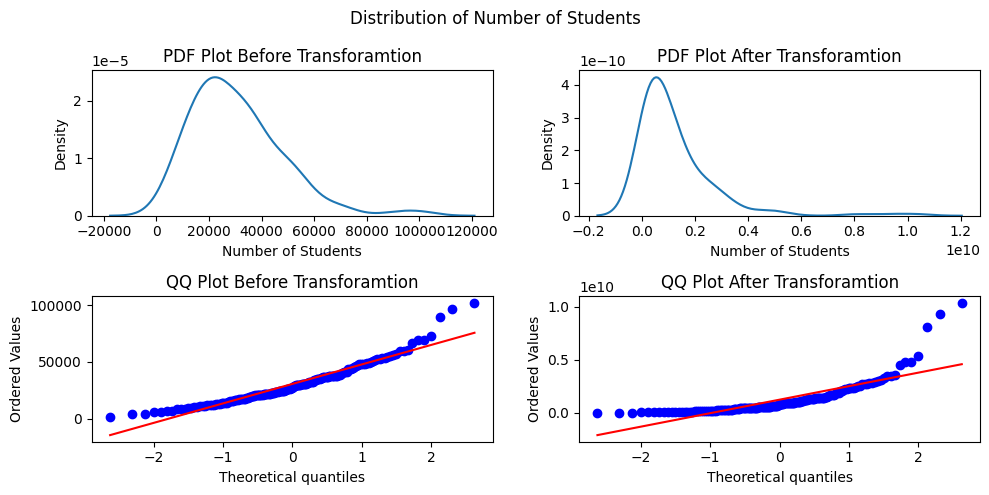

In [53]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Number of Students')

sns.kdeplot(X_train['Number of Students'], ax=axes[0,0])
axes[0,0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_power_transform2, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

stats.probplot(X_train['Number of Students'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_power_transform2, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [54]:
X_train['Number of Students'].skew(), X_train_power_transform2.skew()

(1.2045697184821256, 3.195136550675296)

## On Volumes in the library

In [55]:
X_train_power_transform3 = X_train['Volumes in the library']**2

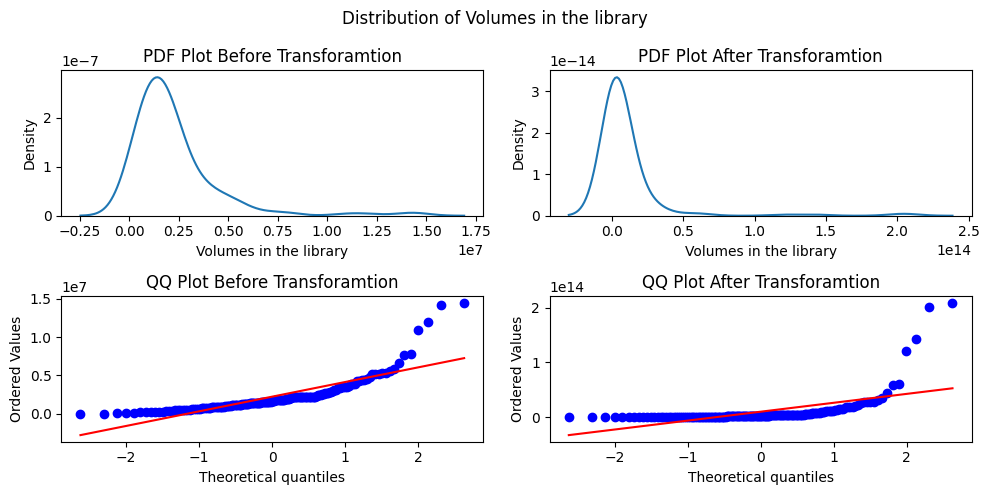

In [56]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Volumes in the library')

sns.kdeplot(X_train['Volumes in the library'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_power_transform3, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

stats.probplot(X_train['Volumes in the library'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_power_transform3, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [57]:
X_train['Volumes in the library'].skew(), X_train_power_transform3.skew()

(3.03137710373831, 5.5367156082381515)

# Square-Root Transformation

## On Academic Staff

In [58]:
X_train_sqrt_transform1 = np.sqrt(X_train['Academic Staff'])

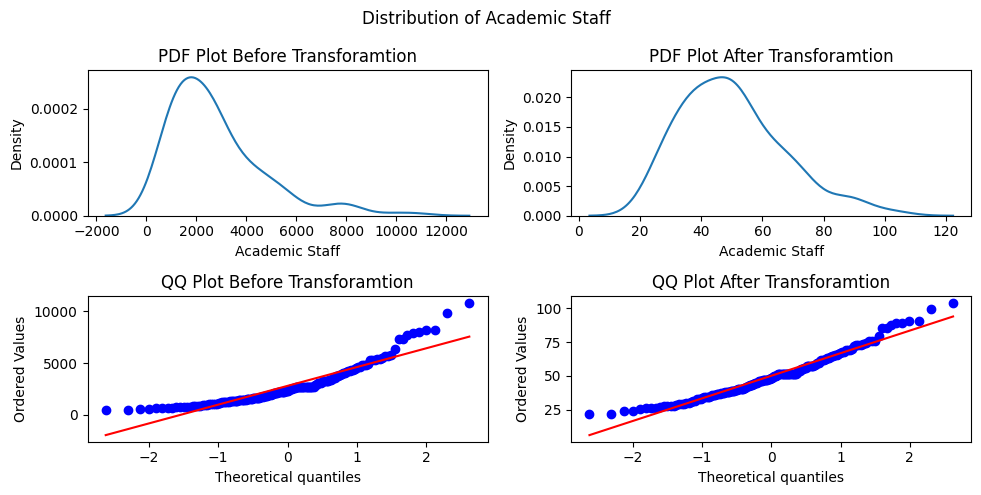

In [59]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Academic Staff')

sns.kdeplot(X_train['Academic Staff'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_sqrt_transform1, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

stats.probplot(X_train['Academic Staff'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_sqrt_transform1, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [60]:
X_train['Academic Staff'].skew(), X_train_sqrt_transform1.skew()

(1.559071960630387, 0.7381128074407246)

## On Number of Student

In [61]:
X_train_sqrt_transform2 = np.sqrt(X_train['Number of Students'])

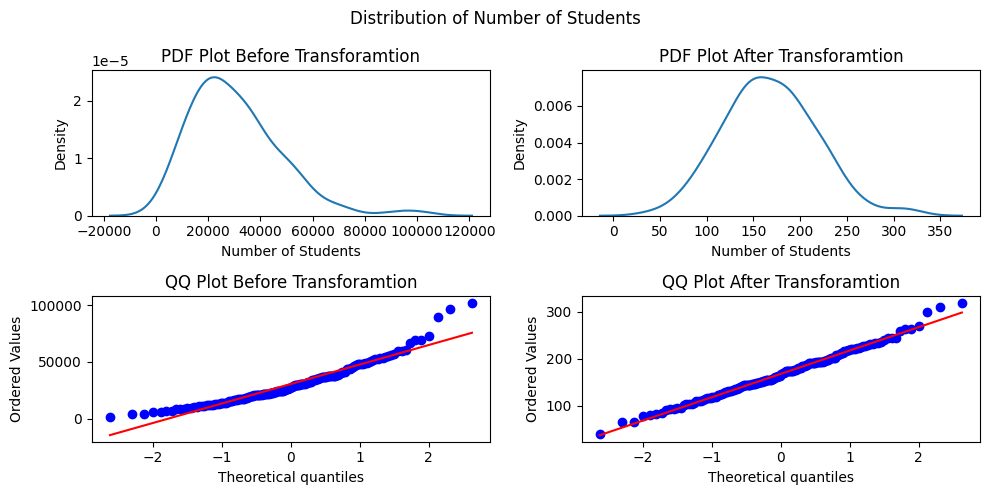

In [62]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Number of Students')

sns.kdeplot(X_train['Number of Students'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_sqrt_transform2, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

stats.probplot(X_train['Number of Students'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_sqrt_transform2, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [63]:
X_train['Number of Students'].skew(), X_train_sqrt_transform2.skew()

(1.2045697184821256, 0.27061321042404396)

## On Volumes in the library

In [64]:
X_train_sqrt_transform3 = np.sqrt(X_train['Volumes in the library'])

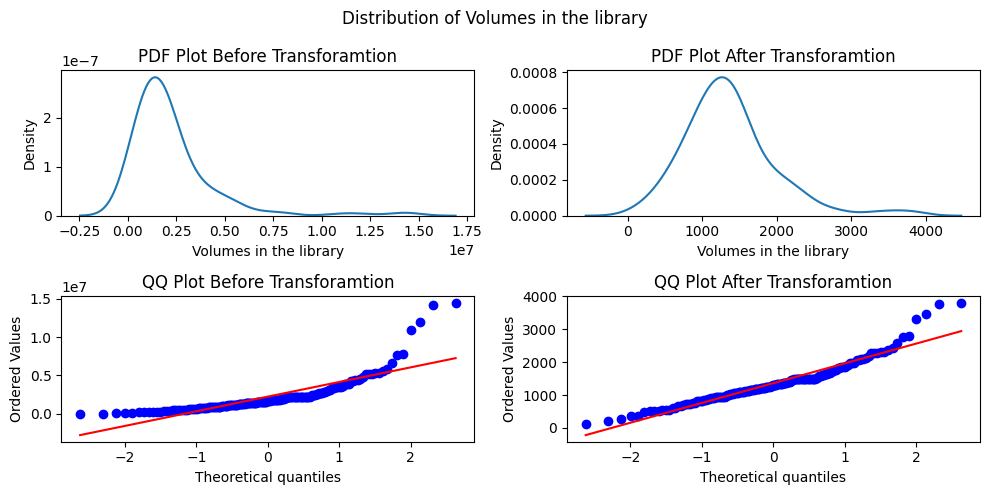

In [65]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Volumes in the library')

sns.kdeplot(X_train['Volumes in the library'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot Before Transforamtion')

sns.kdeplot(X_train_sqrt_transform3, ax=axes[0, 1])
axes[0, 1].set_title('PDF Plot After Transforamtion')

stats.probplot(X_train['Volumes in the library'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot Before Transforamtion')

stats.probplot(X_train_sqrt_transform3, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot After Transforamtion')

plt.tight_layout()
plt.show()

In [66]:
X_train['Volumes in the library'].skew(), X_train_sqrt_transform3.skew()

(3.03137710373831, 1.234080001719801)

# Compare these Transformation which one is best

## On Academic Staff

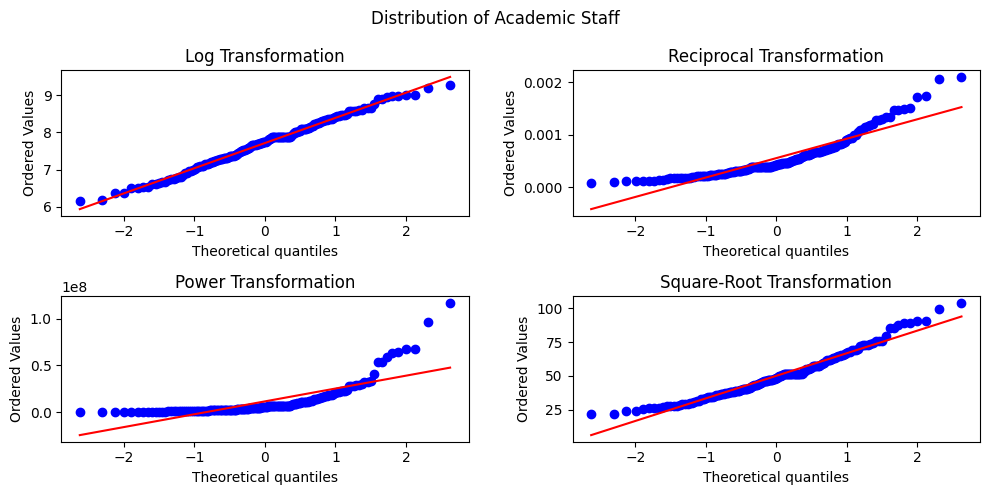

In [67]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Academic Staff')

stats.probplot(X_train_log_transform1, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Log Transformation')

stats.probplot(X_train_reciprocal_transform1, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Reciprocal Transformation')

stats.probplot(X_train_power_transform1, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Power Transformation')

stats.probplot(X_train_sqrt_transform1, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Square-Root Transformation')

plt.tight_layout()
plt.show()

## On Number of Students

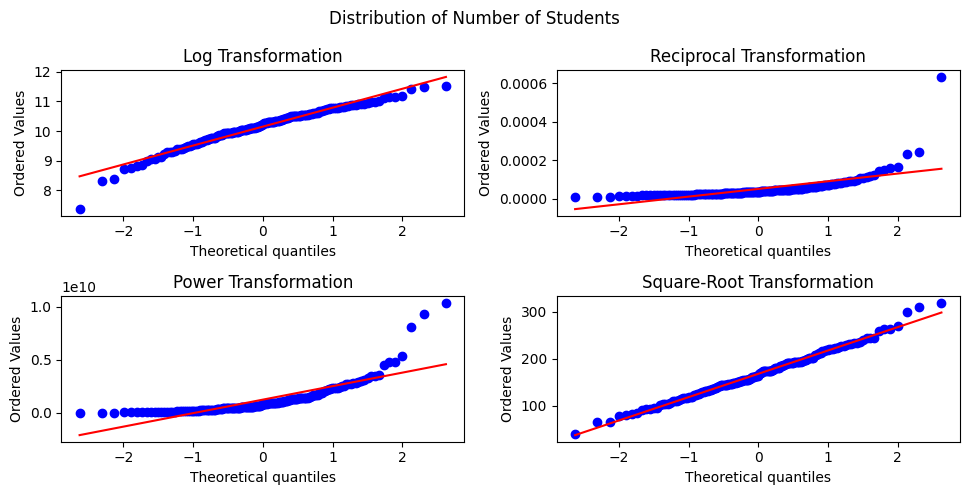

In [68]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Number of Students')

stats.probplot(X_train_log_transform2, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Log Transformation')

stats.probplot(X_train_reciprocal_transform2, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Reciprocal Transformation')

stats.probplot(X_train_power_transform2, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Power Transformation')

stats.probplot(X_train_sqrt_transform2, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Square-Root Transformation')

plt.tight_layout()
plt.show()

## On Volumes in the library

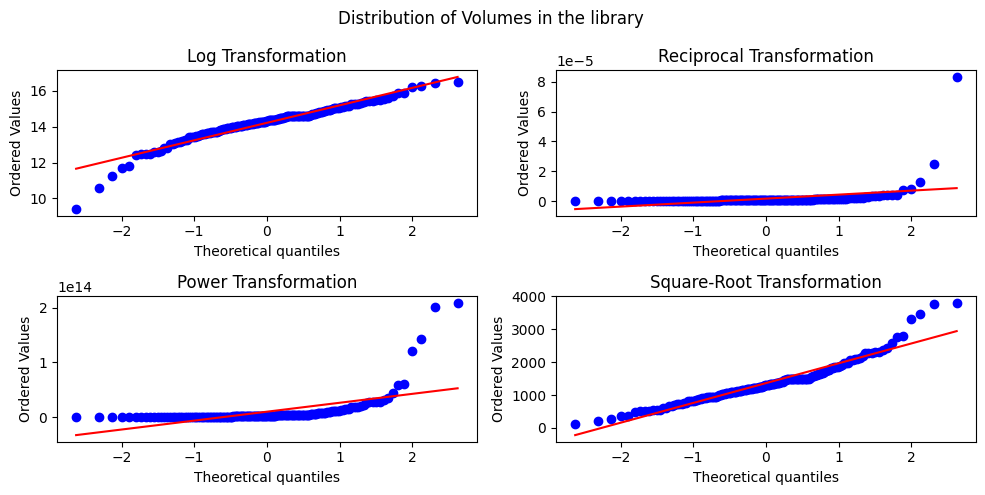

In [69]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of Volumes in the library')

stats.probplot(X_train_log_transform3, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Log Transformation')

stats.probplot(X_train_reciprocal_transform3, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Reciprocal Transformation')

stats.probplot(X_train_power_transform3, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Power Transformation')

stats.probplot(X_train_sqrt_transform3, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Square-Root Transformation')

plt.tight_layout()
plt.show()

> So What do you think? Which one is better for you?
Decision is yours

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 79 to 102
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Established             160 non-null    int64  
 1   Academic Staff          160 non-null    float64
 2   Number of Students      160 non-null    float64
 3   Volumes in the library  160 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.2 KB
